In [103]:
import scipy.sparse as sp #página 352 libro Johansson2019-Numerical Python Scientific Computing and Data Science Applications with Numpy, SciPy and Matplotlib
import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse.linalg as spla


In [64]:
A_dense = np.array([[0,1,0,0],[0,0,0,2],[0,0,3,0],[4,0,0,0]])
print("A_dense: \n", A_dense)

values=[1,2,3,4] #Entradas  no nulas
rows=[0,1,2,3] #índices de fila que tienen las entradas no nulas
cols=[1,3,2,0] #índice de las columnas que tienen las entradas no nulas
A_sparse=sp.coo_matrix((values,(rows,cols)),shape=[4,4]) #Construye una matriz dispersa en una estructura de scipy #shape=dimensiones de la matriz
print("A_sparse: \n", A_sparse)


A_csr=A_sparse.tocsr()
print("A_csr:\n",A_csr)
print(A_csr.data) #imprimer los valores no nulos
print(A_csr.indices)
print(A_csr.indptr)



A_dense: 
 [[0 1 0 0]
 [0 0 0 2]
 [0 0 3 0]
 [4 0 0 0]]
A_sparse: 
 <COOrdinate sparse matrix of dtype 'int64'
	with 4 stored elements and shape (4, 4)>
  Coords	Values
  (0, 1)	1
  (1, 3)	2
  (2, 2)	3
  (3, 0)	4
A_csr:
 <Compressed Sparse Row sparse matrix of dtype 'int64'
	with 4 stored elements and shape (4, 4)>
  Coords	Values
  (0, 1)	1
  (1, 3)	2
  (2, 2)	3
  (3, 0)	4
[1 2 3 4]
[1 3 2 0]
[0 1 2 3 4]


In [92]:

#EJEMPLO

values=[1,3,2,5,6] #Entradas  no nulas
rows=[2,1,3,2,4] #índices de fila que tienen las entradas no nulas
cols=[0,2,4,5] #índice de las columnas que tienen las entradas no nulas
B_csr=sp.csr_array((values,rows,cols),shape=[3,5]) #Construye una matriz dispersa en una estructura de scipy #shape=dimensiones de la matriz
print("B_csr: \n", B_csr)
print(B_csr.toarray())
B_csr.nnz #nnz=número de entradas no nulas

print("\n ",B_csr.data) #imprimer los valores no nulos
print("\n ",B_csr.indices)
print("\n ",B_csr.indptr)


B_csr: 
 <Compressed Sparse Row sparse array of dtype 'int64'
	with 5 stored elements and shape (3, 5)>
  Coords	Values
  (0, 2)	1
  (0, 1)	3
  (1, 3)	2
  (1, 2)	5
  (2, 4)	6
[[0 3 1 0 0]
 [0 0 5 2 0]
 [0 0 0 0 6]]

  [1 3 2 5 6]

  [2 1 3 2 4]

  [0 2 4 5]


<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 500 stored elements and shape (50, 50)>
  Coords	Values
  (0, 1)	0.9133929226806216
  (0, 2)	0.29088457017392766
  (0, 4)	0.04544955615683788
  (0, 5)	0.4975216858910806
  (0, 12)	0.8900465533571967
  (0, 16)	0.548179287641893
  (0, 18)	0.0342651613684799
  (0, 26)	0.4831365929009216
  (0, 30)	0.08886901943268632
  (0, 32)	0.8098218628082683
  (0, 33)	0.15550776026443935
  (0, 38)	0.0379544673177058
  (0, 46)	0.6656262798267084
  (1, 4)	0.22298925195861063
  (1, 16)	0.3345810331161664
  (1, 18)	0.45919998768705694
  (1, 26)	0.18471969053051018
  (1, 29)	0.20293364910586253
  (1, 32)	0.7718079219444653
  (1, 34)	0.6310027359938598
  (1, 38)	0.13132914923897765
  (1, 40)	0.23795180785304115
  (1, 41)	0.21063074002443005
  (2, 1)	0.9295614183996014
  (2, 3)	0.06687770286791794
  :	:
  (48, 4)	0.8052819907927247
  (48, 12)	0.5067071432407013
  (48, 13)	0.560534890475346
  (48, 16)	0.8826023640914356
  (48, 25)	0.4545113130761221

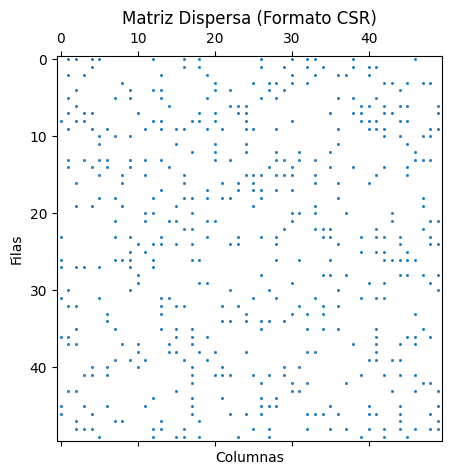

In [45]:
#MATRICES DISPERSAS ALEATORIAS

from scipy.sparse import random
from scipy import stats
import matplotlib.pyplot as plt

# Dimensiones de la matriz
m, n = 50, 50

# Matriz dispersa aleatoria 5x5 con densidad 20%
A = random(m, n, density=0.2, format='csr', data_rvs=stats.uniform().rvs)

print(A)

plt.figure(figsize=(5, 5))
plt.spy(A, markersize=1)  # tamaño grande para que se vea bien
plt.title("Matriz Dispersa (Formato CSR)")
plt.xlabel("Columnas")
plt.ylabel("Filas")
#plt.grid(True, linestyle="--", alpha=0.4)

plt.show()

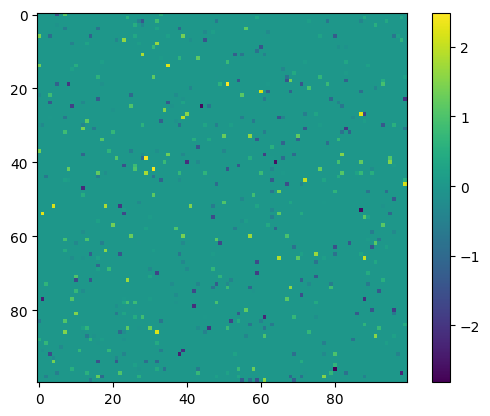

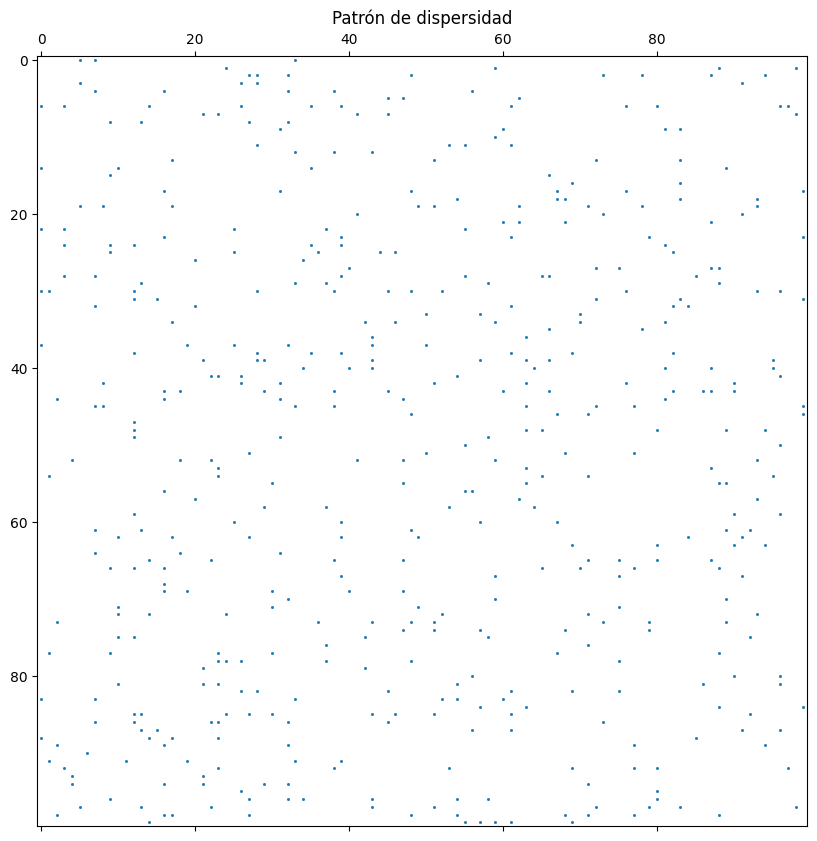

In [85]:
nrows=100
ncols=100
A=sp.random(nrows,ncols,density=0.05,format='csr', data_rvs=np.random.randn)

A_densa = A.toarray()

plt.imshow(A_densa, cmap="viridis")
plt.colorbar()
plt.figure(figsize=(10, 10))
plt.spy(A, markersize=1)  # tamaño grande para que se vea bien
plt.title("Patrón de dispersidad")
plt.show()

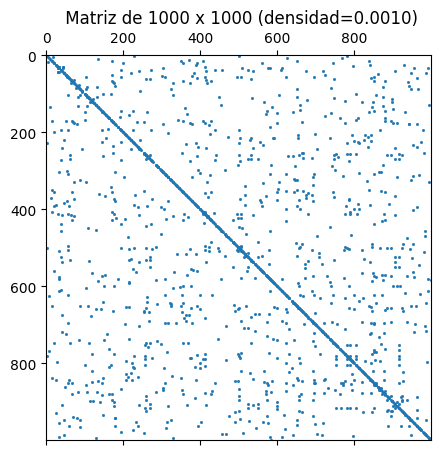

In [83]:
nrows=1000
ncols=1000
A=sp.random(nrows,ncols,density=0.001,format='csr', data_rvs=np.random.randn)
C=A.T*A

plt.figure(figsize=(5, 5))
plt.spy(C, markersize=1)  # tamaño grande para que se vea bien
plt.title(f" Matriz de {nrows} x {ncols} (densidad={A.nnz/(nrows*ncols):.4f})")
plt.show()

In [115]:

import scipy.sparse.linalg as spla
nrows=10
ncols=10
A=sp.random(nrows,ncols,density=0.001,format='csr', data_rvs=np.random.randn)
#print("\n Matriz dispersa:", A)
b = np.random.randn(nrows)
#print("\n Matriz dispersa:", b)

x = spla.spsolve(A, b)
print("Solución obtenida (primeros 10 valores):")
print(x)

Solución obtenida (primeros 10 valores):
[nan nan nan nan nan nan nan nan nan nan]


C:\Users\x\AppData\Local\Temp\ipykernel_22360\4112245310.py:9: MatrixRankWarning: Matrix is exactly singular
  x = spla.spsolve(A, b)


In [ ]:
#CORREGIRRRRRRR ESTE CÓDIGO

nrows=10
ncols=10
X=np.ones((nrows,1))
b=A*X
sol_sp=sp.linalg.spsolve(A,b)
#calcular el tiempo de solo sol_sp


print("Error: ",np.linalg.norm(X-sol_sp,2))

A_dense=A.todense()
sol_dense=np.linalg.solve(A_dense,b)
#calcular el tiempo de solo sol_sp

print("Error:",np.linalg.norm(X-sol_dense,2))

C:\Users\x\AppData\Local\Temp\ipykernel_22360\3773309654.py:5: MatrixRankWarning: Matrix is exactly singular
  sol_sp=sp.linalg.spsolve(A,b)


LinAlgError: SVD did not converge